In [1]:
import sys,os
sys.path.insert(0,'/global/project/projectdirs/metatlas/anaconda/lib/python2.7/site-packages' )
from metatlas import metatlas_objects as metob
import csv


curr_ld_lib_path = ''

os.environ['LD_LIBRARY_PATH'] = curr_ld_lib_path + ':/project/projectdirs/openmsi/jupyterhub_libs/boost_1_55_0/lib' + ':/project/projectdirs/openmsi/jupyterhub_libs/lib'
import sys
# sys.path.remove('/anaconda/lib/python2.7/site-packages')
sys.path.append('/global/project/projectdirs/openmsi/jupyterhub_libs/anaconda/lib/python2.7/site-packages')
sys.path.insert(0,'/project/projectdirs/openmsi/projects/meta-iq/pactolus/pactolus' )

from rdkit import Chem
# from rdkit.Chem.rdMolDescriptors import ExactMolWt
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import Draw

from rdkit import DataStructs
import numpy as np

from matplotlib import pylab as plt

# %matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import json
from pprint import pprint

with open('network_and_view.cyjs') as data_file:    
    data = json.load(data_file)


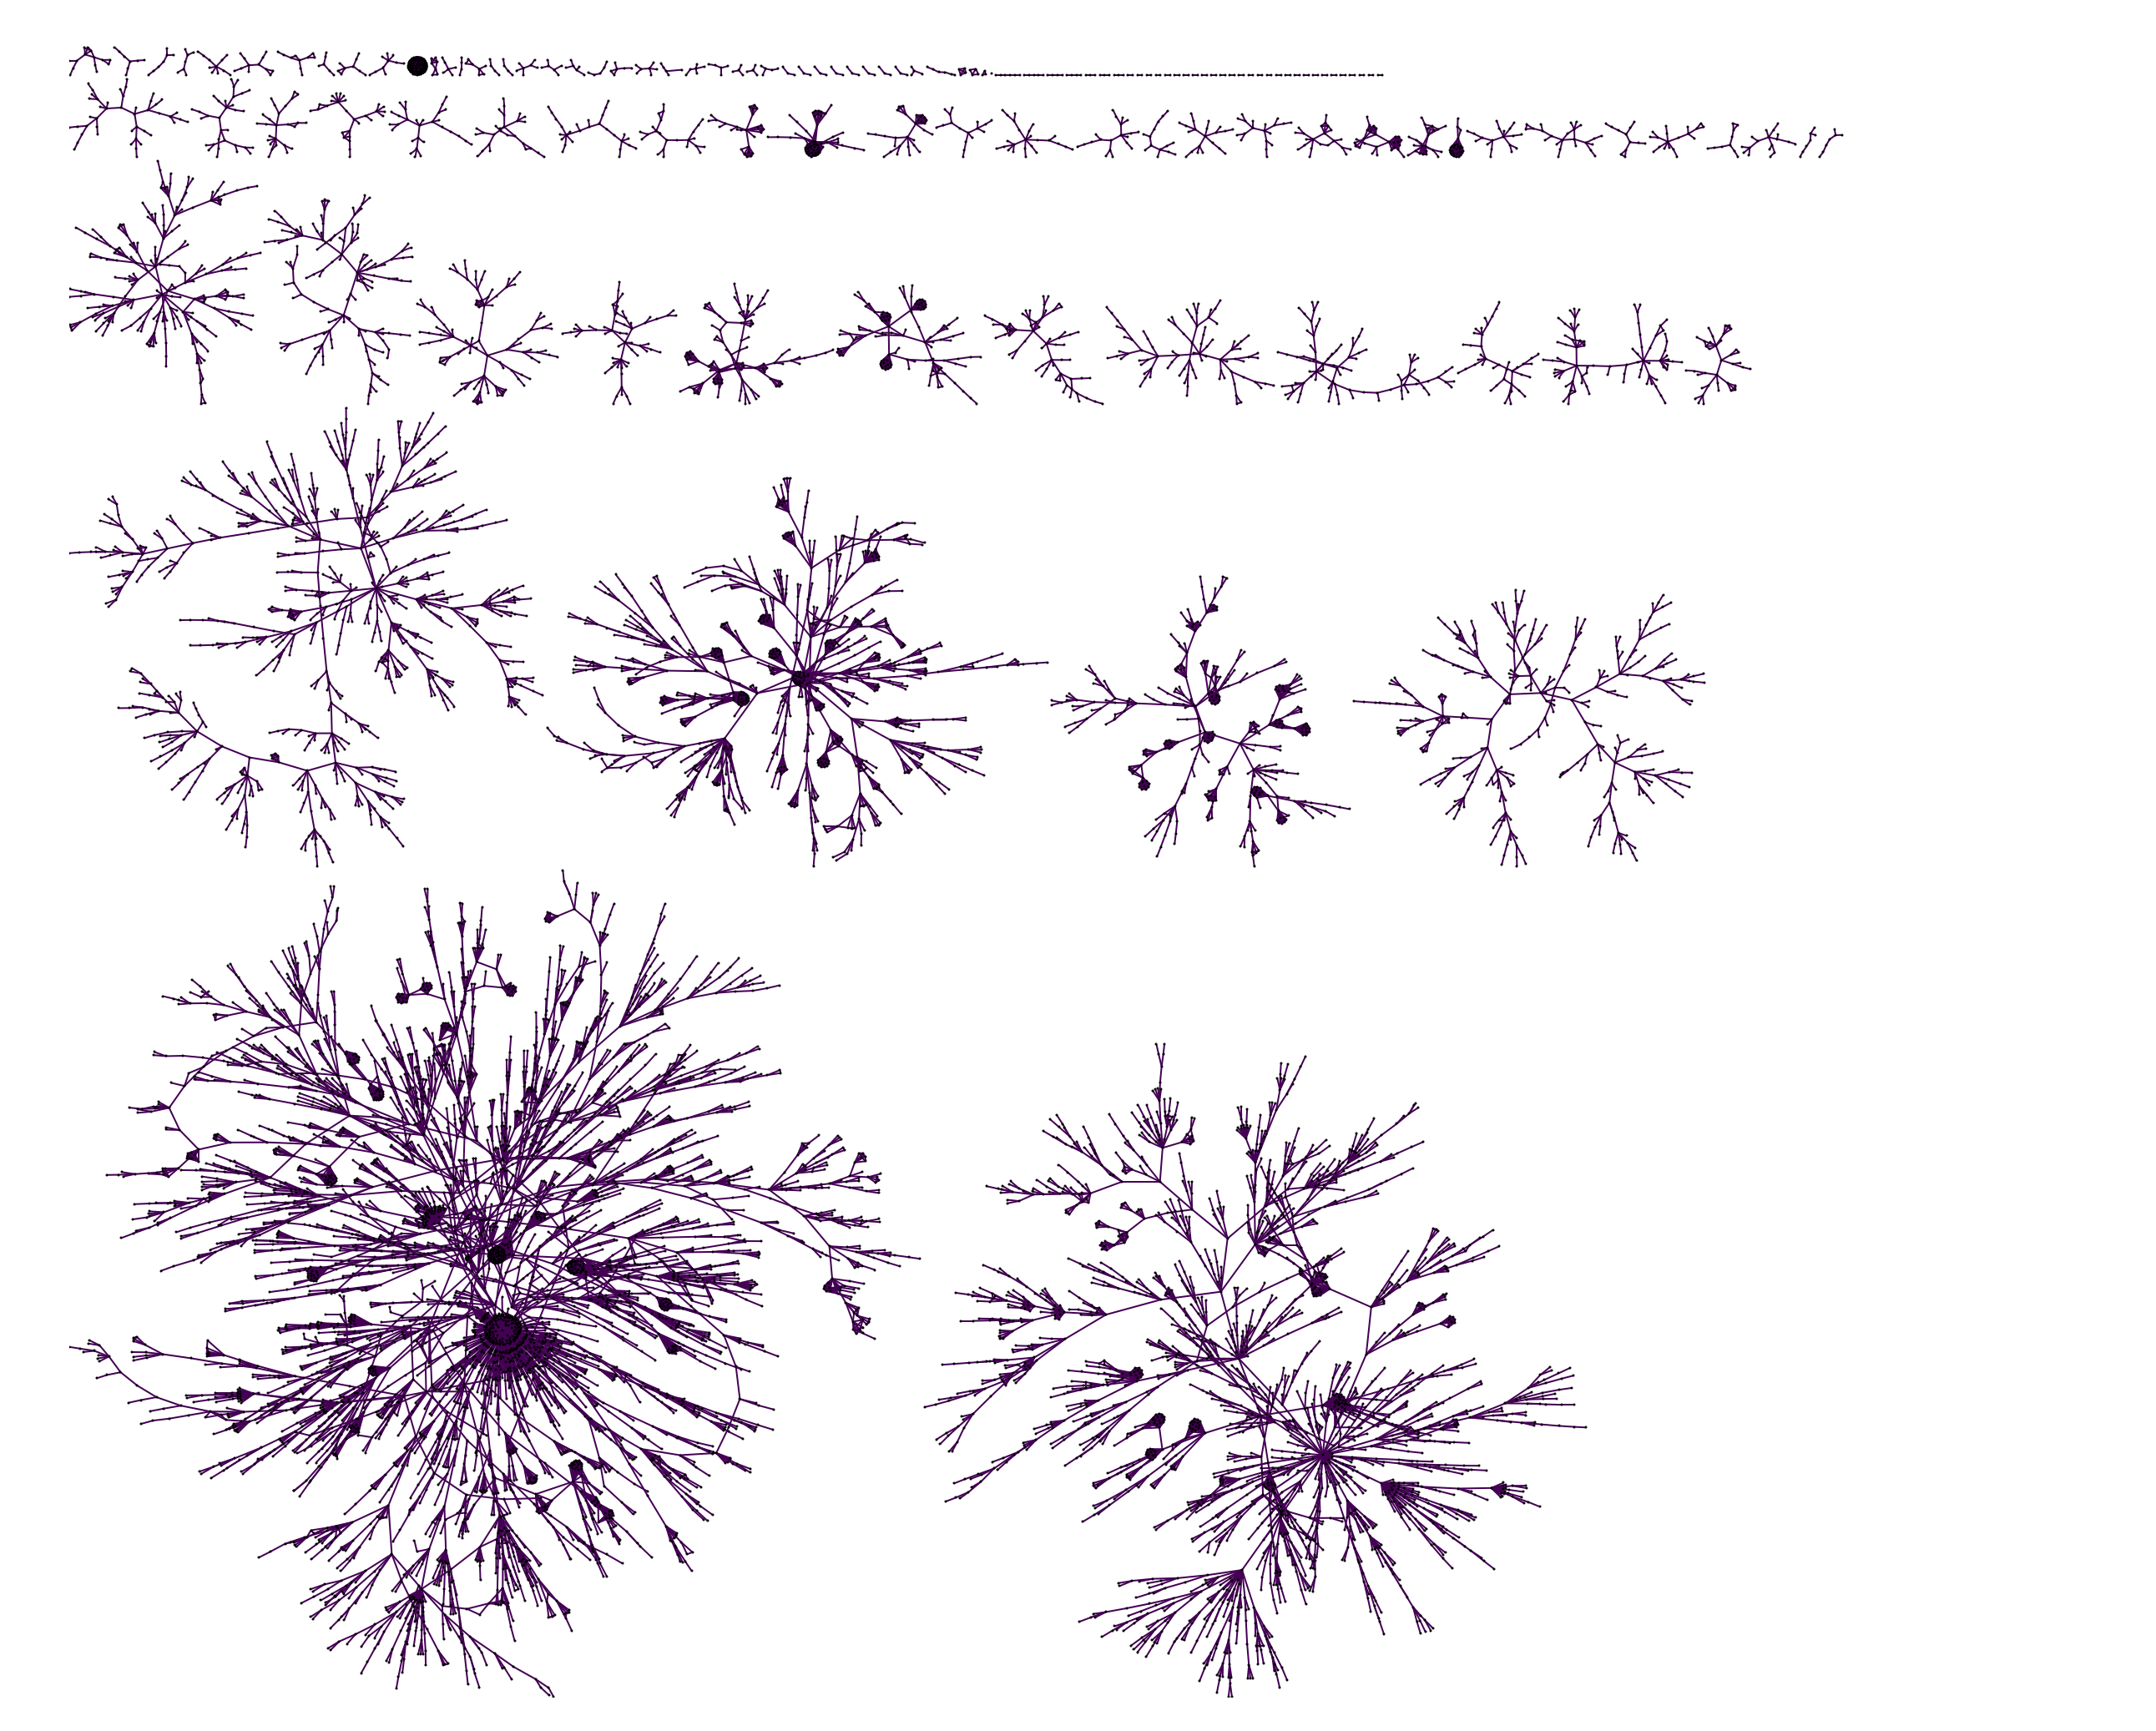

In [58]:
from matplotlib import collections as mplib_collections
x = []
y = []
node_id = []
for n in data['elements']['nodes']:
    x.append(n['position']['x'])
    y.append(n['position']['y'])
    node_id.append(float(n['data']['SUID']))

fig = plt.figure(figsize=(22,18))

myMarker = 'k'#[0.99324789, 0.60615657, 0.1439362] #'aqua'# #'aqua'
myEdges = [0.26700401, 0.00487433, 0.32941519] #
plt.plot(x,y,'o',markersize=1, markeredgecolor=myMarker, markerfacecolor = myMarker)
node_id = np.asarray(node_id)
colors = []
segs = []
for e in data['elements']['edges']:
    idx1 = np.argwhere(node_id == float(e['data']['source']))[0][0]
    idx2 = np.argwhere(node_id == float(e['data']['target']))[0][0]
    colors.append(myEdges)
    segs.append(( (x[idx1], y[idx1]),
                 (x[idx2], y[idx2]) ))

ln_coll = mplib_collections.LineCollection(segs, colors=colors)

ax = plt.gca()
ax.add_collection(ln_coll)
# fig.set_facecolor('w')
# ax.set_xlim(0, 600)    
# ax.set_ylim(0, 400)
# plt.draw()
plt.axis('off')

plt.show()

In [73]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_FULL_PATH = '" + nb.base_url + nb.notebook_path + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [75]:
filename = os.path.basename(NOTEBOOK_FULL_PATH)
%system cp $filename /project/projectdirs/openmsi/www/
temp = '%s/%s'%('/project/projectdirs/openmsi/www',filename)
%system chmod 775 $temp
print 'http://nbviewer.ipython.org/url/portal.nersc.gov/project/openmsi/%s?flush_cache=true'%filename

http://nbviewer.ipython.org/url/portal.nersc.gov/project/openmsi/Plot_MetAtlas_Network.ipynb?flush_cache=true
